In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
seer_df = pd.read_csv('data/Rita inula lekerdezes_tiszt.csv', low_memory=False)

In [3]:
seer_metada_df = pd.read_csv('data/seerstat-variables.csv', low_memory=False, index_col=0, header=7)

## Mit szeretnénk tudni egy paraméterről?
- Lehetséges kiinduló oszlopok
- rangsor az idnuló adatokban
- időbeli eloszlása az adatoszlopoknak
- milyen végső bemeneti értékek legyenek?



In [4]:
unique_new_indices = []
for i, y in enumerate(seer_df['Year of diagnosis']):
    sty = str(y)
    sti = str(i)
    ni = sty + sti
    ni += (8-len(ni)) * '0'
    unique_new_indices.append(int(ni))
seer_df.index = unique_new_indices

In [5]:
seer_df['Year of diagnosis'].value_counts()

0       359741
2015     47435
2016     46483
2014     45976
2013     45443
2012     44723
2011     43887
2009     42515
2010     41964
2008     41488
2007     40541
2001     39164
2002     39060
2006     38810
2005     38504
2017     38231
2000     38181
2004     37815
2003     37288
2018     36307
Name: Year of diagnosis, dtype: int64

In [6]:
seer_df = seer_df[seer_df['Year of diagnosis'] > 1500]
seer_df.replace('Blank(s)', np.nan, inplace=True)
seer_df.drop_duplicates(keep='first', inplace=True)

In [7]:
seer_df.isna().sum()

Age recode with <1 year olds                          0
Sex                                                   0
PRCDA 2017                                            0
Race recode (W, B, AI, API)                           0
Year of diagnosis                                     0
                                                  ...  
Patient ID                                            0
Type of Reporting Source                              0
CoC Accredited Flag (2018+)                      747622
Median household income inflation adj to 2019         0
Rural-Urban Continuum Code                            0
Length: 161, dtype: int64

In [8]:
seer_df['Year of diagnosis'].dtype

dtype('int64')

In [9]:
seer_df['T value - based on AJCC 3rd (1988-2003)'].describe()

count     153693
unique        11
top           T1
freq       89804
Name: T value - based on AJCC 3rd (1988-2003), dtype: object

In [10]:
seer_df.iloc[:5, :10].apply(lambda x: len(x), axis = 1, result_type = 'expand')

20030000    10
20181000    10
20052000    10
20053000    10
20014000    10
dtype: int64

In [72]:
column_names_test = ['T value - based on AJCC 3rd (1988-2003)', 'Derived SEER Combined T Src (2016-2017)']
def analyse(column_names, final_name):
    subdf = seer_df[column_names + ['Year of diagnosis']]
    print(subdf.columns.values)
    subdf_cat = subdf[column_names].copy()
    subdf_cat.dropna(how='all', axis = 0)
    # subdf_cat.columns = [ '#'.join([str(v) for v in list(uni)]) for uni in subdf_cat.apply(lambda x: pd.factorize(x, use_na_sentinel=False)[1], axis = 0)]
    subdf_cat[subdf_cat.columns] = subdf_cat.apply(lambda x: pd.factorize(x, use_na_sentinel=True)[0], axis = 0, result_type='expand')

    fig, axes = plt.subplots(1, 2, figsize = (15, 7))

    subdf_cat.plot(kind='hist', title = f'{final_name} value distribution', xlabel = 'coded value', ylim = [0, 40000], alpha = 0.2, ax = axes[0])

    subdf_time = subdf.copy()
    subdf_time[subdf_time.columns] = subdf_time.apply(lambda x: [x['Year of diagnosis'] if val == val else np.nan for val in x] , axis = 1, result_type='expand')

    subdf_time[column_names].plot(kind='hist', alpha = 0.4, xlim = [2000, 2018], xlabel = 'year of diagnosis', title = f'{final_name} time distribution', ax = axes[1])

    fig.suptitle(final_name)
    fig.savefig(f'var_desc_figs/{final_name}_description.png', dpi = 300)
    fig.show()
# analyse(column_names_test, 'T value')

['Derived HER2 Recode (2010+)' 'PR Status Recode Breast Cancer (1990+)'
 'ER Status Recode Breast Cancer (1990+)' 'Breast Subtype (2010+)'
 'Year of diagnosis']


C:\Users\gyusz\AppData\Local\Temp\ipykernel_12136\1311305923.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


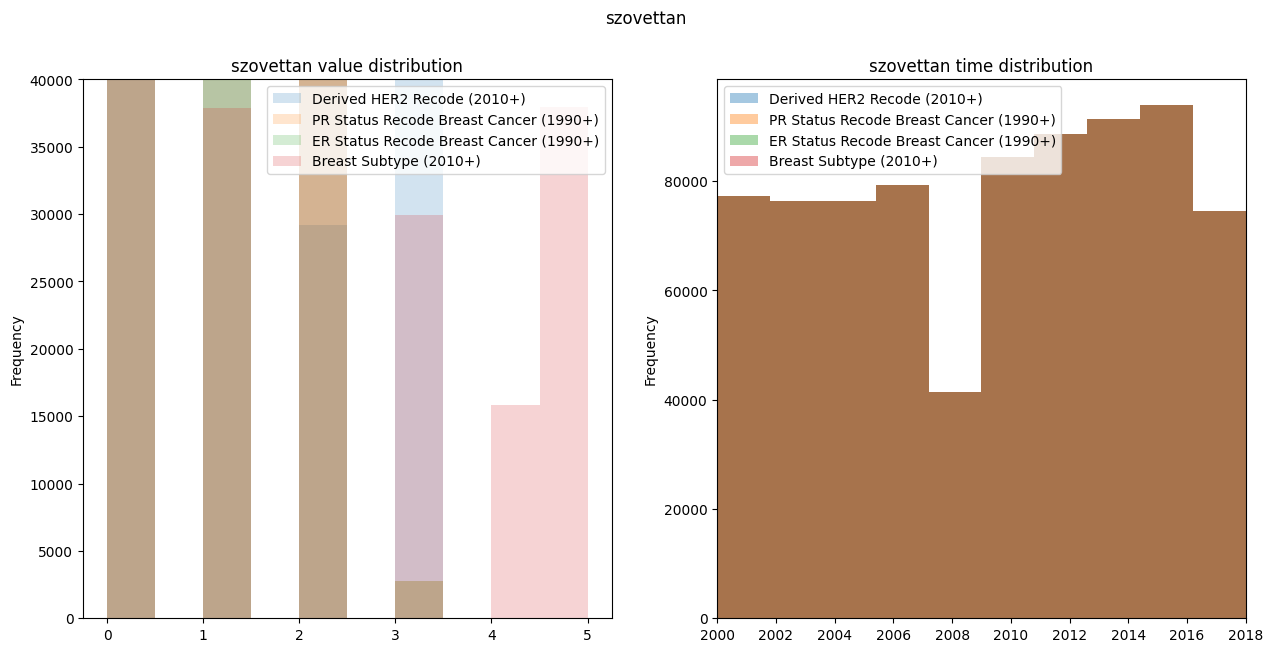

In [73]:
# Szövettan

szovettan_columns = [
    'Derived HER2 Recode (2010+)',
    'PR Status Recode Breast Cancer (1990+)',
    'ER Status Recode Breast Cancer (1990+)',
    'Breast Subtype (2010+)'
]
analyse(szovettan_columns, 'szovettan')

['Tumor Size Summary (2016+)' 'CS tumor size (2004-2015)'
 'EOD 10 - size (1988-2003)' 'Year of diagnosis']


C:\Users\gyusz\AppData\Local\Temp\ipykernel_12136\1311305923.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


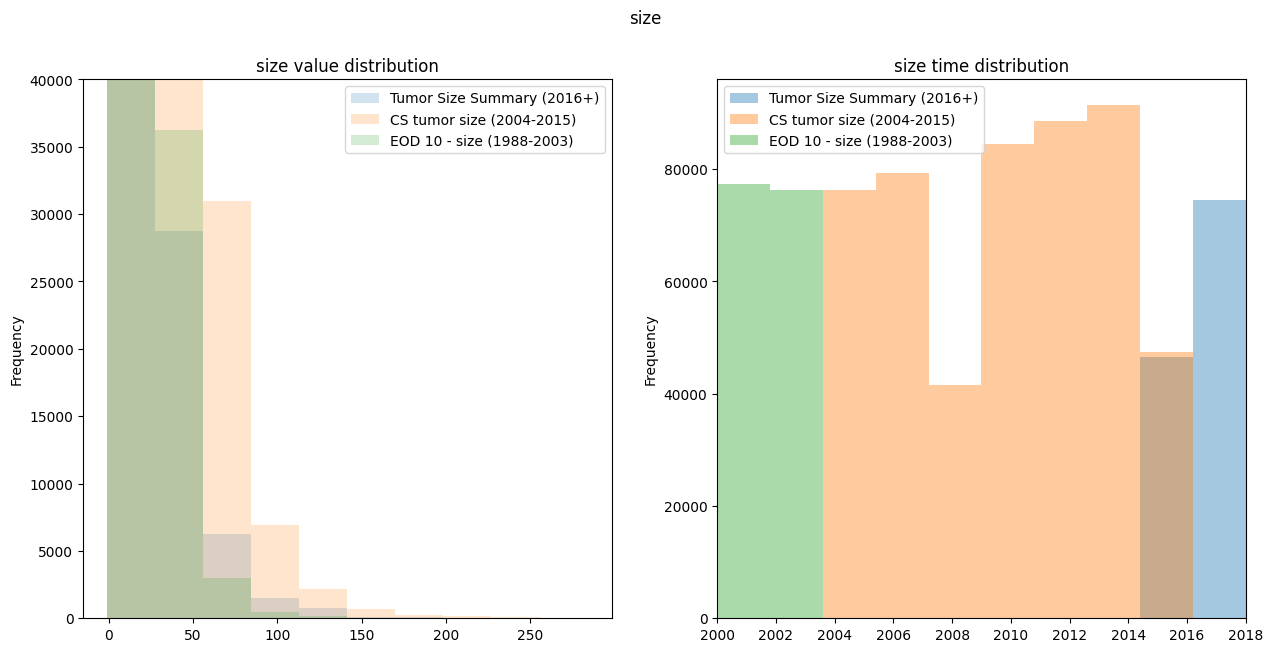

In [74]:
# meret
meret_columns = [
    'Tumor Size Summary (2016+)',
    'CS tumor size (2004-2015)',
    'EOD 10 - size (1988-2003)'
]

analyse(meret_columns, 'size')

['Combined Summary Stage (2004+)' 'Summary stage 2000 (1998-2017)'
 'SEER Combined Summary Stage 2000 (2004-2017)'
 'SEER historic stage A (1973-2015)'
 'Derived EOD 2018 Stage Group (2018+)'
 'Derived SEER Combined T Src (2016-2017)'
 'Breast - Adjusted AJCC 6th Stage (1988-2015)'
 'AJCC stage 3rd edition (1988-2003)'
 'SEER modified AJCC stage 3rd (1988-2003)' 'Year of diagnosis']


C:\Users\gyusz\AppData\Local\Temp\ipykernel_12136\1311305923.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


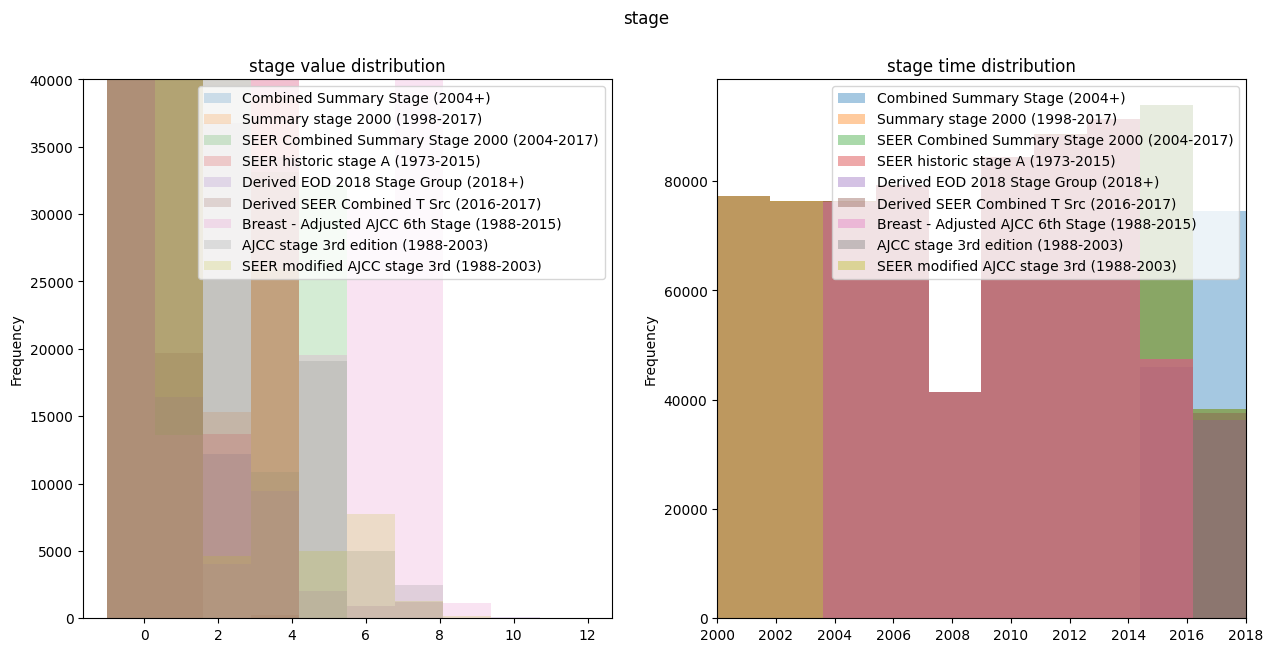

In [75]:
# stage
stage_columns = [
    'Combined Summary Stage (2004+)',
    'Summary stage 2000 (1998-2017)',
    'SEER Combined Summary Stage 2000 (2004-2017)',
    'SEER historic stage A (1973-2015)',
    'Derived EOD 2018 Stage Group (2018+)',
    'Derived SEER Combined T Src (2016-2017)',
    'Breast - Adjusted AJCC 6th Stage (1988-2015)',
    'AJCC stage 3rd edition (1988-2003)',
    'SEER modified AJCC stage 3rd (1988-2003)'
]

analyse(stage_columns, 'stage')

['Grade (thru 2017)' 'Grade Clinical (2018+)' 'Year of diagnosis']


C:\Users\gyusz\AppData\Local\Temp\ipykernel_12136\1311305923.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


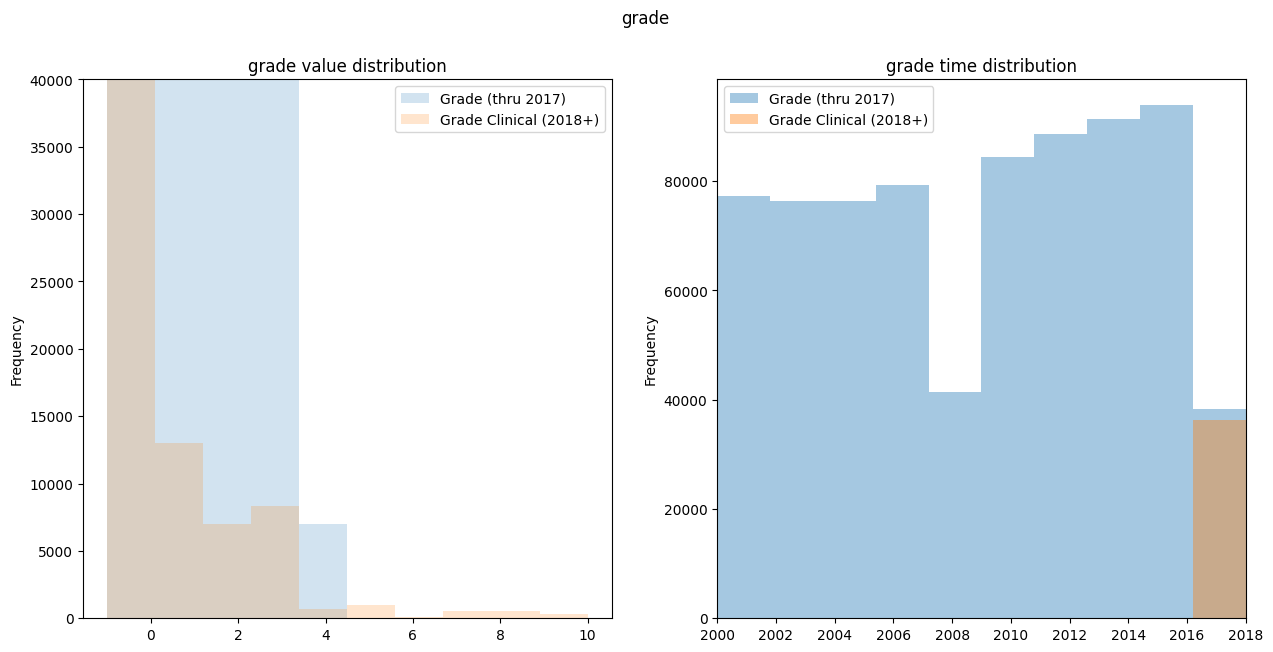

In [76]:
#grade

grade_columns = [
    'Grade (thru 2017)',
    'Grade Clinical (2018+)'
]

analyse(grade_columns, 'grade')

['Derived EOD 2018 T (2018+)' 'Derived AJCC T, 7th ed (2010-2015)'
 'Derived SEER Combined T (2016-2017)'
 'Derived SEER Combined T Src (2016-2017)'
 'Breast - Adjusted AJCC 6th T (1988-2015)'
 'T value - based on AJCC 3rd (1988-2003)' 'Year of diagnosis']


C:\Users\gyusz\AppData\Local\Temp\ipykernel_12136\1311305923.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


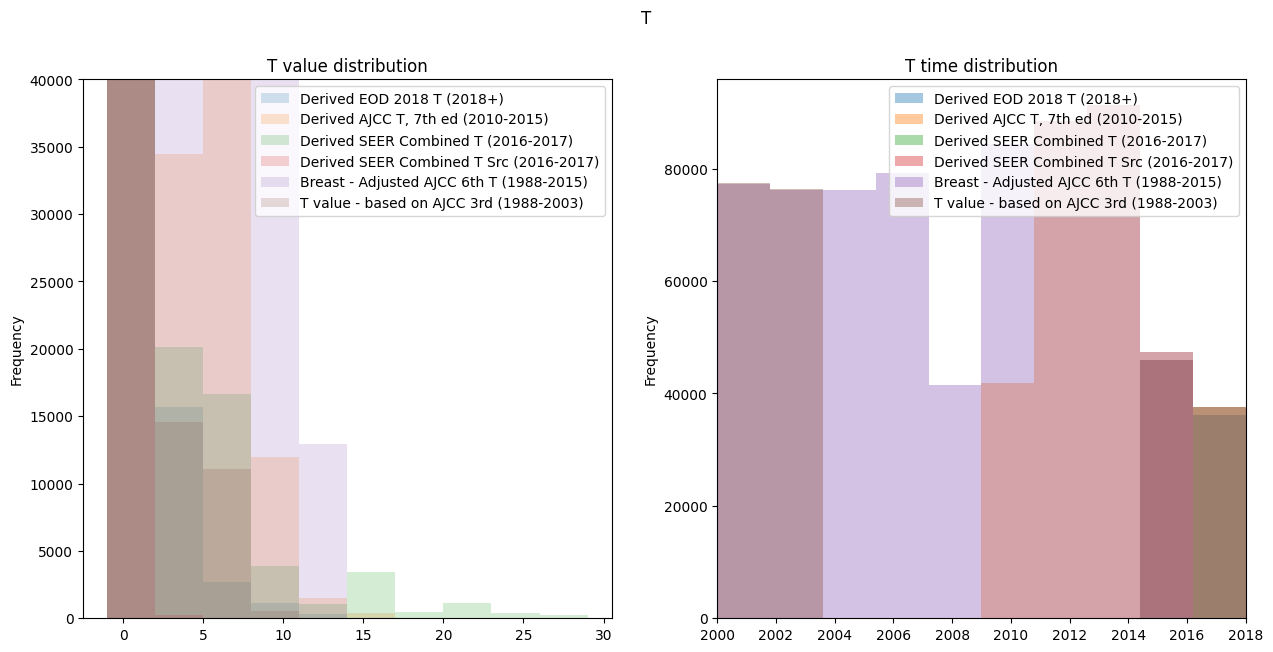

In [77]:
# T
T_columns = [
    'Derived EOD 2018 T (2018+)',
    'Derived AJCC T, 7th ed (2010-2015)',
    'Derived SEER Combined T (2016-2017)',
    'Derived SEER Combined T Src (2016-2017)',
    'Breast - Adjusted AJCC 6th T (1988-2015)',
    'T value - based on AJCC 3rd (1988-2003)'
]

analyse(T_columns, 'T')

['Derived AJCC M, 7th ed (2010-2015)'
 'Derived SEER Combined M Src (2016-2017)'
 'Breast - Adjusted AJCC 6th M (1988-2015)'
 'Derived AJCC M, 6th ed (2004-2015)'
 'M value - based on AJCC 3rd (1988-2003)' 'Derived EOD 2018 M (2018+)'
 'Year of diagnosis']


C:\Users\gyusz\AppData\Local\Temp\ipykernel_12136\1311305923.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


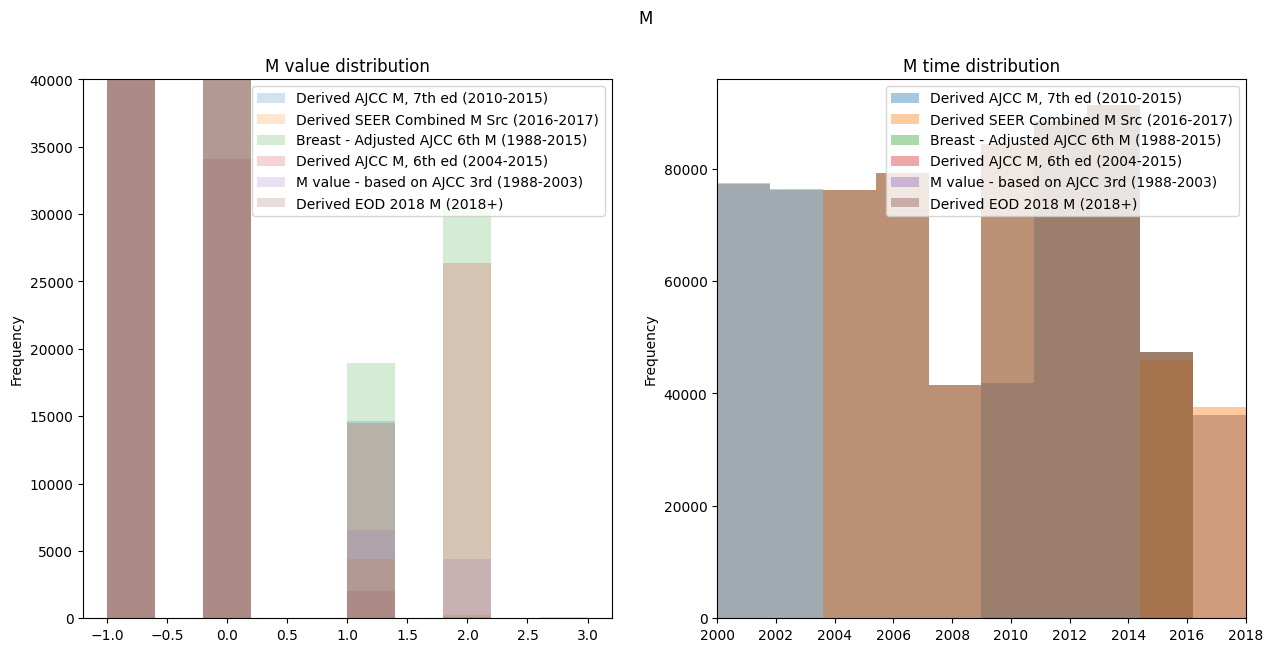

In [78]:
# M

M_columns = [
    'Derived AJCC M, 7th ed (2010-2015)',
    'Derived SEER Combined M Src (2016-2017)',
    'Breast - Adjusted AJCC 6th M (1988-2015)',
    'Derived AJCC M, 6th ed (2004-2015)',
    'M value - based on AJCC 3rd (1988-2003)',
    'Derived EOD 2018 M (2018+)'
]

analyse(M_columns, 'M')

['Tumor marker 1 (1990-2003)' 'Tumor marker 2 (1990-2003)'
 'Tumor marker 3 (1998-2003)' 'Year of diagnosis']


C:\Users\gyusz\AppData\Local\Temp\ipykernel_12136\1311305923.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


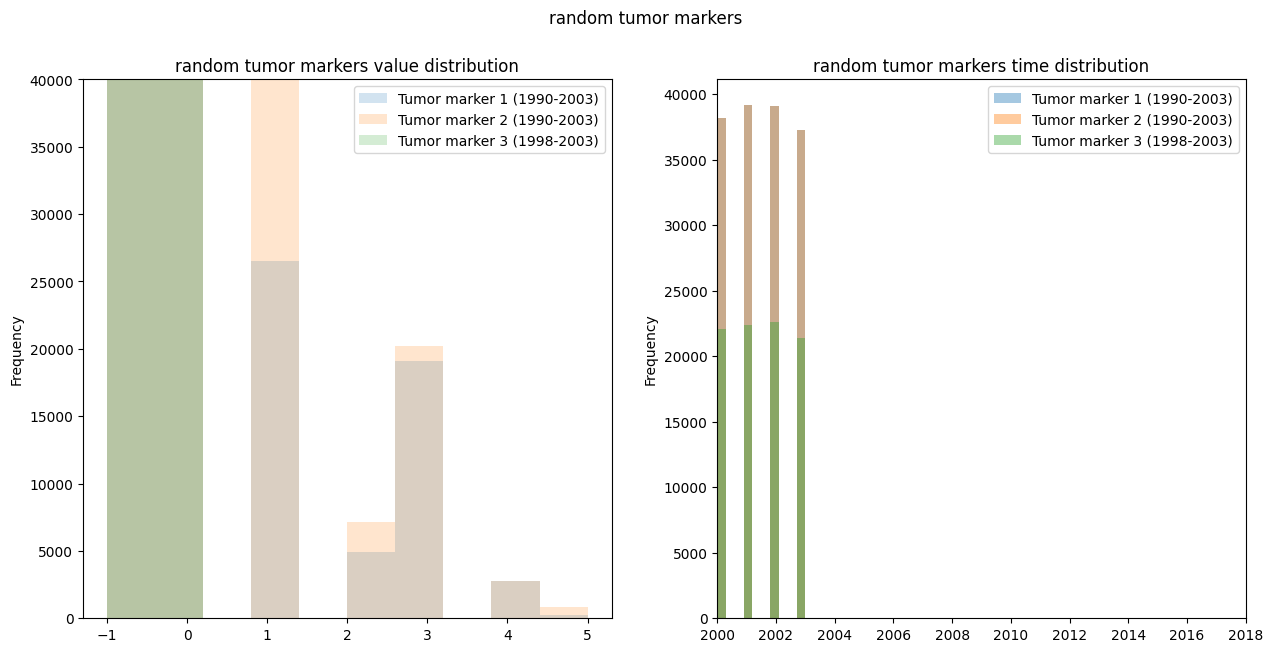

In [79]:
#tumor markers

tm_columns = [
    'Tumor marker 1 (1990-2003)',
    'Tumor marker 2 (1990-2003)',
    'Tumor marker 3 (1998-2003)'
]

analyse(tm_columns, 'random tumor markers')